Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.2  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić 

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **21. listopada 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matrixom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(1)
phi = poly.fit_transform(X)
print(phi)

def poly_feature(X, index):
    polynomialFeature = PolynomialFeatures(index)
    phi = polynomialFeature.fit_transform(X)
    return phi


[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg

In [6]:
pseudoInvers = dot(inv(dot(phi.T, phi)), phi.T)
w = dot(pseudoInvers, y)
print(w)

w = dot(pinv(phi), y)
print(w)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

[2.2        2.65714286 3.11428571 4.02857143]
4.085714285714286
2.042857142857143


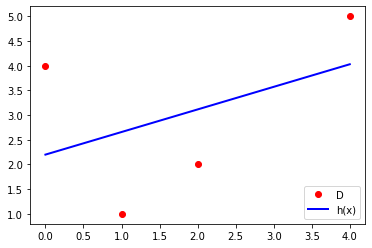

In [7]:
from sklearn.metrics import mean_squared_error

# h = phi*w 
h_x = dot(phi, w)
print(h_x)

# izracunavam pogresku ucenja po formuli
E = 0
for i in range(len(X)):
    E += 0.5*((y[i]-h_x[i])**2)
print(E)

# mean_squared_error
E_mse = mean_squared_error(y, h_x)
print(E_mse)

# crtanje
plt.plot(X, y, 'ro', label='D')
plt.plot(X, h_x, 'b', linewidth=2, label='h(x)')
plt.legend(loc = 'lower right')
plt.show()

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [8]:
# phi je dimenzija 4x2, print cisto za vidni prikaz
print(phi)
print("")

# Pokusava napraviti inverz matrice phi, za gresku izbaci exception
try:
    phi_inv = inv(phi) 
except LinAlgError: print("Ne postoji inverz!")

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]

Ne postoji inverz!


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# w
linRegress = LinearRegression().fit(phi, y)

# w0
print(linRegress.intercept_)
# w1,w2,...,wn
print(linRegress.coef_)
print("")
# w vektor
print([linRegress.intercept_, linRegress.coef_[1]])

# mean_squared_error
pred = linRegress.predict(phi)

print(mean_squared_error(h_x, y))
print(mean_squared_error(pred, y))

def h_function(phi, y):
    linearRegression = LinearRegression().fit(phi, y)
    h = linearRegression.predict(phi)
    return h


2.2
[0.         0.45714286]

[2.2, 0.4571428571428572]
2.042857142857143
2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [11]:
from numpy.random import normal

def make_labels(X, f, noise=0) :
    return np.array([f(x) + normal(0, noise) for x in X])

In [12]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

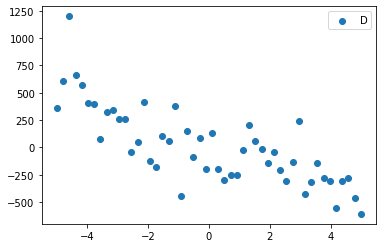

In [13]:
X2 = make_instances(-5, 5, 50)
y2 = make_labels(X2, lambda x : 5 + x - 2*x**2 - 5*x**3, noise = 200)

plt.scatter(X2, y2, label='D')
plt.legend(loc="upper right")
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

38157.21332962238
38157.21332962238


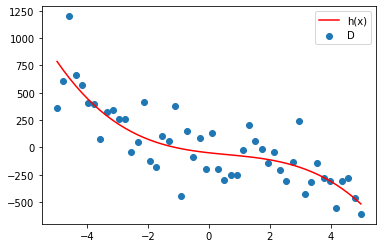

In [14]:
phi2b = poly_feature(X2, 3)
# polyFeat = PolynomialFeatures(3)
# phi2b = polyFeat.fit_transform(X)

# 1. nacin - putem mnozenja
w2b = dot(pinv(phi2b), y2)
h2b = dot(phi2b, w2b)
print(mean_squared_error(y2, h2b))

# 2. nacin - preko ugradenih funkcija
h2b1 = h_function(phi2b, y2)
# linearRegression = LinearRegression().fit(phi2b, y2)
# h2b1 = linearRegression.predict(phi2b)
print(mean_squared_error(y2, h2b1))

plt.scatter(X2, y2, label='D')
# plt.plot(X2, y2, label='D') -> spaja tocke u siljastu funkciju
plt.plot(X2, h2b, 'r', label='h(x)')
plt.legend(loc = 'upper right')
plt.show()


### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

47754.35976483181
38157.21332962238
37060.543773741374
30386.7589257332
22217.58628789801


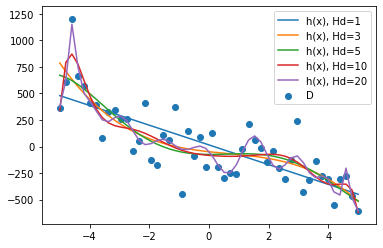

In [15]:
def polyH_function(index, X, y):
    polynomialFeatures = PolynomialFeatures(index)
    phi = polynomialFeatures.fit_transform(X)
    linearRegression = LinearRegression().fit(phi, y)
    h = linearRegression.predict(phi)
    return h

X3 = X2
y3 = y2
#X3 = make_instances(-5, 5, 50)
#y3 = make_labels(X2, lambda x : 5 + x - 2*x**2 - 5*x**3, noise = 200)

Hd = [1, 3, 5, 10, 20]
for i in range(5):
    h3 = polyH_function(Hd[i], X2, y2)
    print(mean_squared_error(y2, h3))
    plt.plot(X2, h3, label='h(x), Hd=' + str(Hd[i]))
    
plt.scatter(X2, y2, label='D')
plt.legend(loc = 'upper right')
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [16]:
from sklearn.model_selection import train_test_split

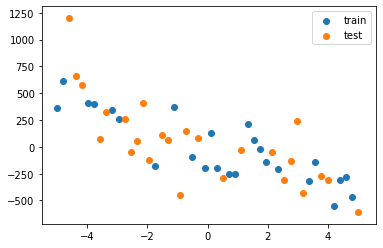

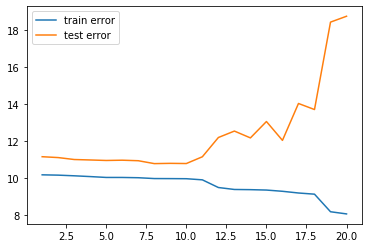

In [17]:
def h_train_test(index, X_train, X_test, y_train):
    polynomialFeatures = PolynomialFeatures(index)
    
    # train
    phi_train = polynomialFeatures.fit_transform(X_train)
    w = dot(pinv(phi_train), y_train)
    h_train = dot(phi_train, w)
    
    # test
    phi_test = polynomialFeatures.fit_transform(X_test)
    h_test = dot(phi_test, w)
    
    return h_train, h_test


X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size = 0.5)

#train3b = (X_train, y_train)
#test3b = (X_test, y_test)

Hd = list(range(1, 21))

trainError = []
testError = []

for i in range(1,21):
    h_train3, h_test3 = h_train_test(i, X_train3, X_test3, y_train3)
    
    # Stavljamo u listu errora
    trainError.append(np.log(mean_squared_error(y_train3, h_train3)))
    testError.append(np.log(mean_squared_error(y_test3, h_test3)))

#print(trainError)
#print(testError)   

plt.scatter(X_train3, y_train3, label='train')
plt.scatter(X_test3, y_test3, label='test')
plt.legend(loc='upper right')
plt.show()

plt.plot(Hd, trainError, label='train error')
plt.plot(Hd, testError, label='test error')
plt.legend(loc='upper left')
plt.show()

### (c)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za sve kombinacija broja primjera $N\in\{100,200,1000\}$ i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

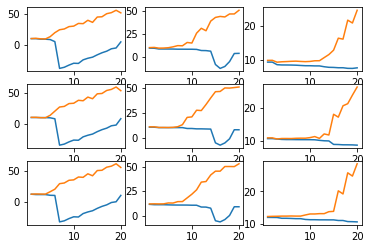

In [18]:
def polynomial(x) :
    return 5 + x - 2*(x**2) - 5*x**3

X3c = make_instances(-5, 5, 1000)
X_train3c, X_test3c = train_test_split(X3c, test_size = 0.5)

X_shape = X_train3.shape[0]

sigma = [100, 200, 500]
Hd = list(range(1, 21))

k = 0

# Racunanje sa noise-om
for noise in sigma:
    y_train3c = make_labels(X_train3c, polynomial, noise)
    y_test3c = make_labels(X_test3c, polynomial, noise)
    
    for i, scale in enumerate([1/3, 2/3, 1]):
        scale = int(X_shape* scale)
        trainE = X_train3c[0:scale, :]
        testE = X_test3c[0:scale, :]
        trainL = y_train3c[0:scale, :]
        testL = y_test3c[0:scale, :]

        trainError3c = []
        testError3c = []
        
        # Train i test
        for j in Hd:
            h_train3c, h_test3c = h_train_test(j, trainE, testE, trainL)
            
            trainError3c.append(log(mean_squared_error(trainL, h_train3c)))
            testError3c.append(log(mean_squared_error(testL, h_test3c)))


        # Crtanje svakog pojedinog grafa
        k += 1
        plt.subplot(3,3,k)
        plt.plot(Hd, trainError3c)
        plt.plot(Hd, testError3c)
        

plt.show()

        


***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [19]:
def L2(phi, lamb, labels):
    identity = np.identity(4)
    #identity[0, 0] = 0
    return dot(dot(inv(dot(phi.T, phi) + lamb * identity), phi.T), labels)

X4 = np.array([[0],[1],[2],[4]])
y4 = np.array([4,1,2,5])

phi4 = poly_feature(X4, 3)
#print(phi4)
#print(inv(dot(phi4.T, phi4)))

lamb = [0, 1, 10]

for i in lamb:
    w4a = L2(phi4, i, y4)
    print("lambda = " + str(i))
    print(w4a)

lambda = 0
[ 4.         -5.91666667  3.375      -0.45833333]
lambda = 1
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
lambda = 10
[0.43312265 0.11060671 0.13827839 0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [20]:
from sklearn.linear_model import Ridge

In [21]:
def w_function(index, phi, y):
    L2Regression = Ridge(alpha = index)
    L2Regression.fit(phi, y)
    w0 = L2Regression.intercept_
    w = L2Regression.coef_
    w = w.T
    w[0] = w0
    return w

lamda = [0, 1, 10]

for i in lamda:
    w4b = w_function(i, phi4, y4)
    #L2Regression = Ridge(alpha = i)
    #L2Regression.fit(phi, y)
    #w0 = L2Regression.intercept_
    #w = L2Regression.coef_
    #w = w.T
    #w[0] = w0
    print("lambda = " + str(i))
    print (w4b)

lambda = 0
[ 4.         -5.91666667  3.375      -0.45833333]
lambda = 1
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
lambda = 10
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

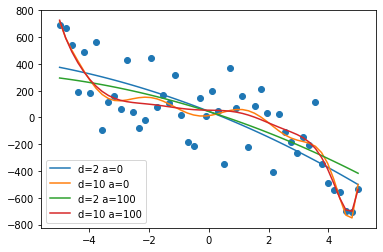

In [22]:
X5 = make_instances(-5, 5, 50)
y5 = make_labels(X5, polynomial, 200)

lamb =[0, 100]
d = [2, 10]

for l in lamb:   
    for i in d:
        phi5 = poly_feature(X5, i)
        
        w5a = w_function(l, phi5, y5)
        h5a = dot(phi5, w5a)
        
        plt.plot(X5, h5a, label="d=" + str(i) + " a=" + str(l), markersize=3)
        plt.legend(loc="lower left")

plt.scatter(X5, y5, label='D')
plt.show()


### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


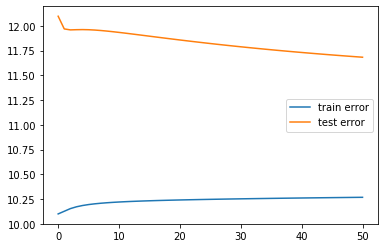

In [23]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size = 0.5)
d = 10

phi_train5 = poly_feature(X_train5, d)
phi_test5 = poly_feature(X_test5, d)

lamb = range(0, 51)

trainError5 = []
testError5 = []

for i in lamb:
    w5b = w_function(i, phi_train5, y_train5)
    
    h_train5 = dot(phi_train5, w5b)
    h_test5 = dot(phi_test5, w5b)
    
    trainError5.append(log(mean_squared_error(y_train5, h_train5)))
    testError5.append(log(mean_squared_error(y_test5, h_test5)))
    
plt.plot(lamb, trainError5, label='train error')
plt.plot(lamb, testError5, label='test error')
plt.legend(loc='center right')
plt.show()


### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [24]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=10$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

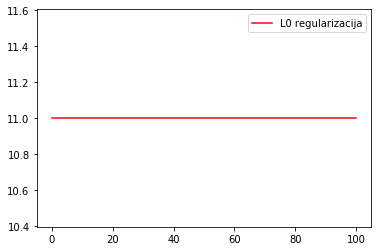

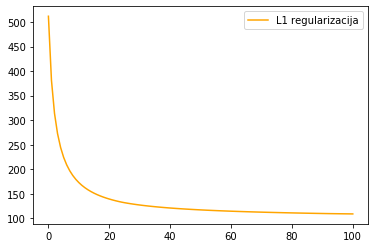

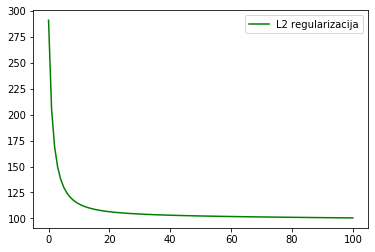

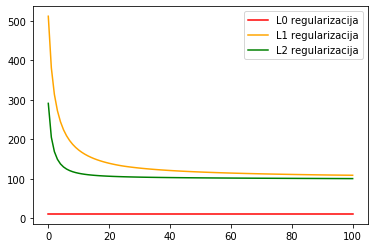

In [25]:
from sklearn.linear_model import Ridge

def L_function(w, indeks):
    if indeks == 0:
        return nonzeroes(w)
    elif indeks == 1:
        return sum(abs(w))
    elif indeks == 2:
        return sqrt(dot(w.T, w)[0][0])
    else:
        return 0

X6a = make_instances(-5, 5, 50)
y6a = make_labels(X6a, polynomial, 200)
    
X_train6a, X_test6a, y_train6a, y_test6a = train_test_split(X6a, y6a, test_size = 0.5)
#X_train, y_train = train3b
#X_test, y_test = test3b

d = 10
L0 = []
L1 = []
L2 = []

phi_train6a = poly_feature(X_train6a, d)
phi_test6a = poly_feature(X_test6a, d)

lamb = range(0, 101)

for i in lamb:
    w6a = w_function(i, phi_train6a, y_train6a)
    
    L0.append(L_function(w6a, 0))
    L1.append(L_function(w6a, 1))
    L2.append(L_function(w6a, 2))

    
plt.plot(lamb, L0, color='red', label='L0 regularizacija')
plt.legend(loc='upper right')
plt.show()

plt.plot(lamb, L1, color='orange', label='L1 regularizacija')
plt.legend(loc='upper right')
plt.show()

plt.plot(lamb, L2, color='green', label='L2 regularizacija')
plt.legend(loc='upper right')
plt.show()

plt.plot(lamb, L0, color='red', label='L0 regularizacija')
plt.plot(lamb, L1, color='orange', label='L1 regularizacija')
plt.plot(lamb, L2, color='green', label='L2 regularizacija')
plt.legend(loc='upper right')

plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Zanemarite upozorenja.

C:\Users\Ivan Bucic\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\Ivan Bucic\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Ivan Bucic\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384295.63664130255, tolerance: 224.03864367464848
  positive)
C:\Users\Ivan Bucic\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385454.19322880404, tolerance: 224.03864367464848
  positive)
C:\Users\Ivan Bucic\Anaconda3\lib\site-packages\

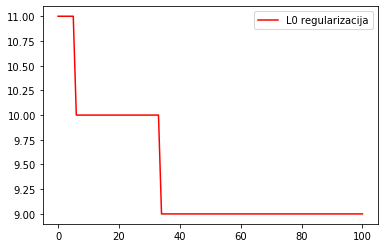

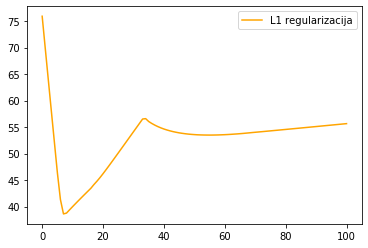

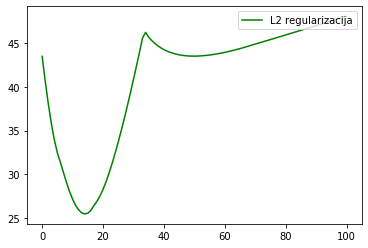

In [26]:
from sklearn.linear_model import Lasso

def L2_function(w):
    return sqrt(dot(w.T, w))

X_train6b, X_test6b, y_train6b, y_test6b = train_test_split(X6a, y6a, test_size = 0.5)

d = 10
L0 = []
L1 = []
L2 = []

phi_train6b = poly_feature(X_train6b, d)
phi_test6b = poly_feature(X_test6b, d)

lamb = range(0, 101)

for i in lamb:
    L2Reg = Lasso(alpha = i)
    L2Reg.fit(phi_train6b, y_train6b)
    w6b0 = L2Reg.intercept_
    w6b = L2Reg.coef_
    w6b = w6b.T
    w6b[0] = w6b0
    
    L0.append(L_function(w6b, 0))
    L1.append(L_function(w6b, 1))
    L2.append(L2_function(w6b))

    
plt.plot(lamb, L0, color='red', label='L0 regularizacija')
plt.legend(loc='upper right')
plt.show()

plt.plot(lamb, L1, color='orange', label='L1 regularizacija')
plt.legend(loc='upper right')
plt.show()

plt.plot(lamb, L2, color='green', label='L2 regularizacija')
plt.legend(loc='upper right')
plt.show()

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [27]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)** Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

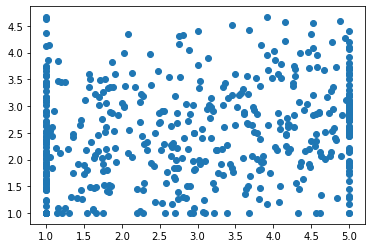

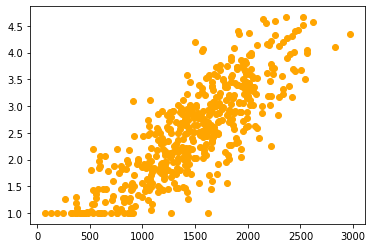

In [28]:
plt.scatter(grade_in_highschool, grades_y)
plt.show()

plt.scatter(exam_score, grades_y, color='orange')
plt.show()

**b)** Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

[0.1506118  0.00141497 0.09477276]


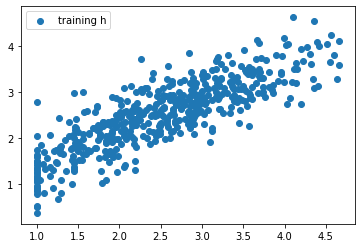

In [29]:
phi7b = poly_feature(grades_X, 1)

lamb = 0.01

w7b = w_function(lamb, phi7b, grades_y)
print(w7b)

h7b = dot(phi7b, w7b)

plt.scatter(grades_y, h7b, label="training h")
plt.legend(loc="upper left")
plt.show()


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [30]:
from sklearn.preprocessing import StandardScaler

[[8.07023426e-17]
 [8.16303750e-01]
 [1.51677612e-01]]


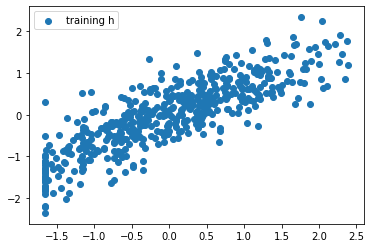

In [31]:
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1, 1))
#grades_y_fixed = grades_y

phi7b1 = poly_feature(grades_X_fixed, 1)

lamb = 0.01

w7b1 = w_function(lamb, phi7b1, grades_y_fixed)
print(w7b1)

h7b1 = dot(phi7b1, w7b1)

plt.scatter(grades_y_fixed, h7b1, label="training h")
plt.legend(loc="upper left")
plt.show()


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)** Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [32]:
grades_X_fixed_colinear = grades_X_fixed
colinear = []

for i in grades_X_fixed_colinear:
    colinear.append([i[-1]])

grades_X_fixed_colinear = append(grades_X_fixed_colinear, colinear, axis=1)

print(grades_X_fixed_colinear)


[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

[[8.07031579e-17]
 [8.16303637e-01]
 [7.58395686e-02]
 [7.58395686e-02]]


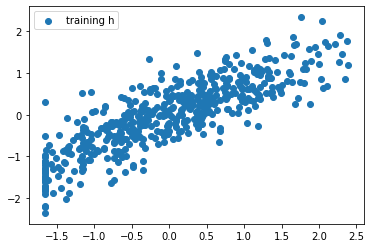

In [33]:
phi8a = poly_feature(grades_X_fixed_colinear, 1)

lamb = 0.01

w8a = w_function(lamb, phi8a, grades_y_fixed)
print(w8a)

h8a = dot(phi8a, w8a)

plt.scatter(grades_y_fixed, h8a, label="training h")
plt.legend(loc="upper left")
plt.show()

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)** Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [34]:
lamb001 = []
lamb1000 = []

lamb = [0.01, 1000]

for i in range(1,11):
    X_train8c, X_test8c, y_train8c, y_test8c = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size = 0.5)
    phi8b = poly_feature(X_train8c, 1)
    
    for l in lamb:
        w8b = w_function(l, phi8b, y_train8c)
        if l == 0.01:
            lamb001.append(w8b)
        elif l == 1000:
            lamb1000.append(w8b)
        print("Lambda = "+ str(l) +"\n"+ str(w8b))
    print("\n")
print("\n")
    
print("Lambda = 0.01: ")
for i in range(0,3):
    print(std(lamb001[i]))
print("")
print("Lambda = 1000: ")
for i in range(0,3):
    print(std(lamb1000[i]))


Lambda = 0.01
[[-0.01045662]
 [ 0.79385128]
 [ 0.06504303]
 [ 0.06504303]]
Lambda = 1000
[[-0.0234989 ]
 [ 0.16436364]
 [ 0.03812874]
 [ 0.03812874]]


Lambda = 0.01
[[0.02152062]
 [0.80739011]
 [0.0761075 ]
 [0.0761075 ]]
Lambda = 1000
[[0.03212117]
 [0.15992321]
 [0.02415424]
 [0.02415424]]


Lambda = 0.01
[[0.00921447]
 [0.814158  ]
 [0.07673386]
 [0.07673386]]
Lambda = 1000
[[-0.02601733]
 [ 0.16128257]
 [ 0.02717137]
 [ 0.02717137]]


Lambda = 0.01
[[-0.01820559]
 [ 0.83265053]
 [ 0.07483515]
 [ 0.07483515]]
Lambda = 1000
[[-0.04966402]
 [ 0.16579999]
 [ 0.03405283]
 [ 0.03405283]]


Lambda = 0.01
[[0.01261939]
 [0.79735626]
 [0.08013669]
 [0.08013669]]
Lambda = 1000
[[-0.0250465 ]
 [ 0.15703356]
 [ 0.02664742]
 [ 0.02664742]]


Lambda = 0.01
[[0.00283109]
 [0.81845427]
 [0.04525193]
 [0.04525193]]
Lambda = 1000
[[0.01706322]
 [0.17833349]
 [0.03188297]
 [0.03188297]]


Lambda = 0.01
[[-0.04553636]
 [ 0.80086373]
 [ 0.0614553 ]
 [ 0.0614553 ]]
Lambda = 1000
[[-0.05404667]
 [ 0.155

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)** Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_X_fixed_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.


In [35]:
lamb = [0.01, 10]
I = identity(3)
I[0][0] = 0
phi8c = grades_X_fixed_colinear

for l in lamb:
    colinear_number = cond(dot(phi8c.T, phi8c) + l*I)
    print(colinear_number)

100542.8559261793
101.53146069838026


**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  